<a href="https://www.kaggle.com/code/kmljts/pandas-practice-7-4-tips?scriptVersionId=184701306" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Pandas Practice

### Original Work: <https://github.com/guipsamora/pandas_exercises>
Huge shoutout to [guipsamora](https://github.com/guipsamora) for creating these fantastic Pandas exercises! They are clear, concise, and cover essential concepts effectively.  
Uploaded to Kaggle for easy interactivity.  


# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [2]:
tips = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv')
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 4. Delete the Unnamed 0 column

In [3]:
tips.drop(columns=['Unnamed: 0'], inplace=True)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 5. Plot the total_bill column histogram

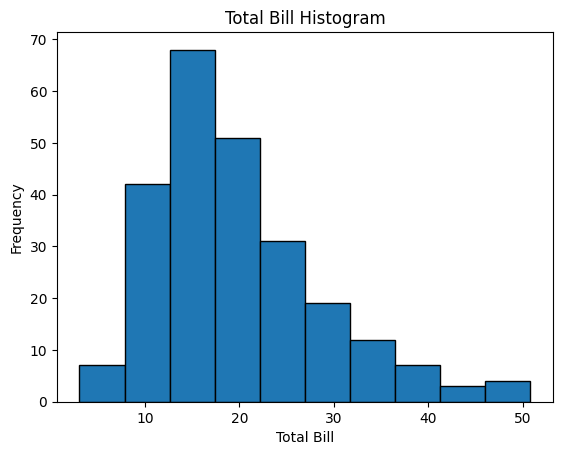

In [4]:
plt.hist(tips.total_bill, edgecolor='black')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.title('Total Bill Histogram')

plt.show()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

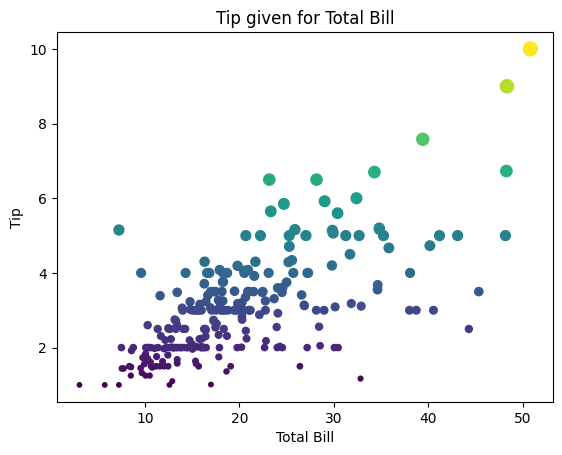

In [5]:
plt.scatter(tips.total_bill, tips.tip, s=tips.tip * 10, c=tips.tip)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Tip given for Total Bill')

plt.show()

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

In [6]:
tips['size'].min(), tips['size'].max()

(1, 6)

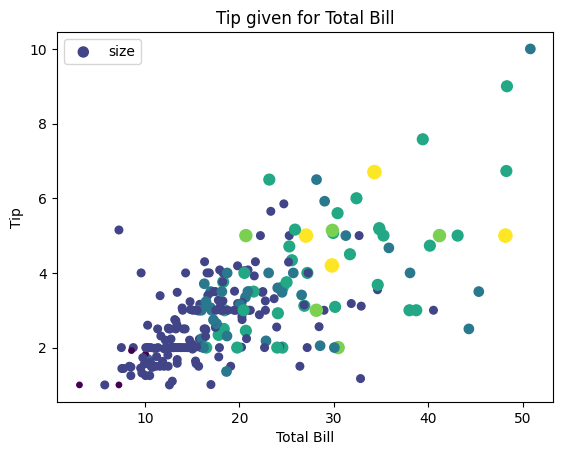

In [7]:
plt.scatter(tips.total_bill, tips.tip, s=tips['size'] * 15, c=tips['size'], label='size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Tip given for Total Bill')
plt.legend()

plt.show()

### Step 8. Present the relationship between days and total_bill value

In [8]:
df = tips.groupby('day').total_bill.mean()
df

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

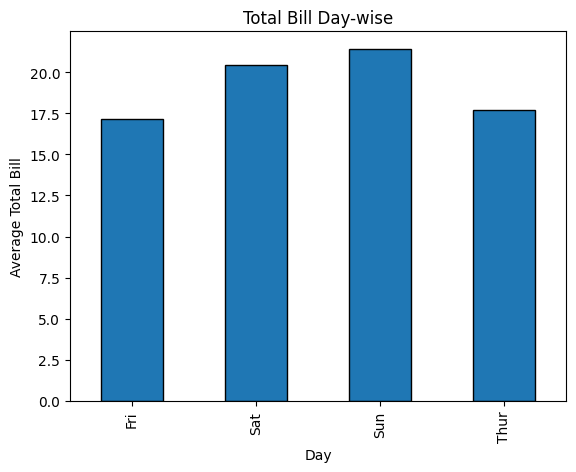

In [9]:
# soln 1

df.plot(kind='bar', edgecolor='k')
plt.xlabel('Day')
plt.ylabel('Average Total Bill')
plt.title('Total Bill Day-wise')

plt.show()

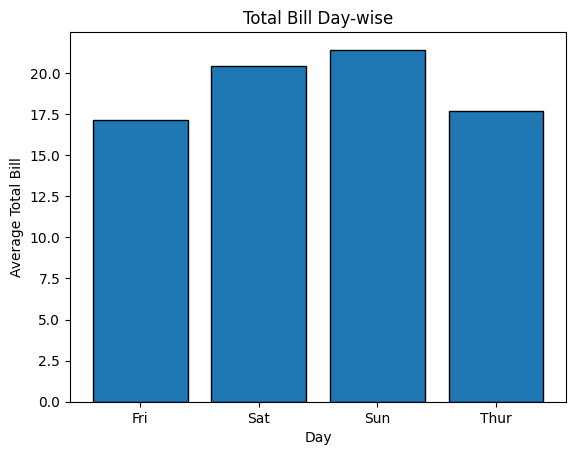

In [10]:
# soln 2

plt.bar(df.index, df.values, edgecolor='k')
plt.xlabel('Day')
plt.ylabel('Average Total Bill')
plt.title('Total Bill Day-wise')

plt.show()

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

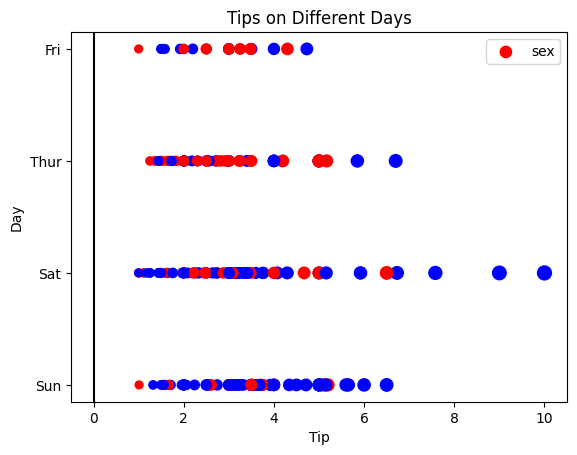

In [11]:
plt.scatter(tips.tip, tips.day, c=tips.sex.apply(lambda x: 'r' if x == 'Female' else 'b'), s=(tips.tip * 1000) ** 0.5, label='sex')
plt.axvline(x=0, c='k')

plt.xlabel('Tip')
plt.ylabel('Day')
plt.title('Tips on Different Days')
plt.legend()

plt.show()

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

In [12]:
# couldn't figure this one out

tips.groupby(['day', 'time']).total_bill.mean()

day   time  
Fri   Dinner    19.663333
      Lunch     12.845714
Sat   Dinner    20.441379
Sun   Dinner    21.410000
Thur  Dinner    18.780000
      Lunch     17.664754
Name: total_bill, dtype: float64

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

In [13]:
for i, (time, series) in enumerate(tips.groupby('time').tip):
    print(i, time)
    display(series)

0 Dinner


0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 176, dtype: float64

1 Lunch


77     4.00
78     3.00
79     2.71
80     3.00
81     3.40
       ... 
222    1.92
223    3.00
224    1.58
225    2.50
226    2.00
Name: tip, Length: 68, dtype: float64

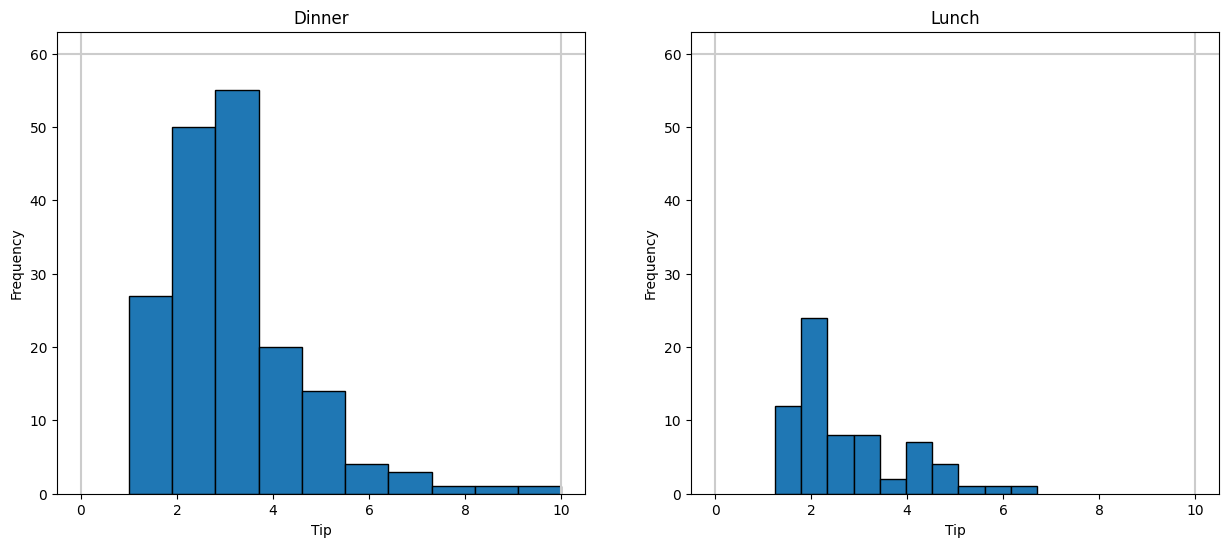

In [14]:
plt.figure(figsize=(15, 6))
for i, (time, series) in enumerate(tips.groupby('time').tip):
    plt.subplot(1, 2, i+1)
    plt.hist(series, edgecolor='k')
    plt.axvline(x=0, c='0.8')
    plt.axvline(x=10, c='0.8')
    plt.axhline(y=60, c='0.8')
    plt.xlabel('Tip')
    plt.ylabel('Frequency')
    plt.title(time)
    
plt.show()

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

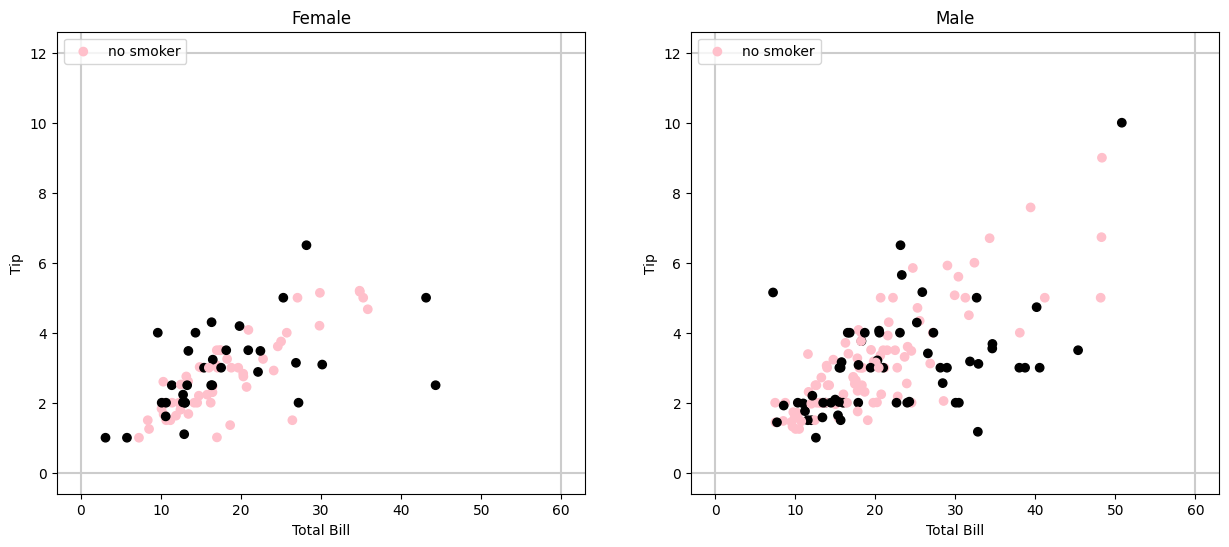

In [15]:
plt.figure(figsize=(15, 6))
for i, (sex, df) in enumerate(tips.groupby('sex')):
    plt.subplot(1, 2, i+1)
    plt.scatter(df.total_bill, df.tip, c=df.smoker.apply(lambda x: 'black' if x == 'Yes' else 'pink'), label='no smoker')
    plt.axhline(0, c='0.8')
    plt.axvline(0, c='0.8')
    plt.axhline(12, c='0.8')
    plt.axvline(60, c='0.8')
    plt.xlabel('Total Bill')
    plt.ylabel('Tip')
    plt.title(sex)
    plt.legend(loc='upper left')
    
plt.show()

### BONUS: Create your own question and answer it using a graph.

In [16]:
pass